
## Network with "OriginDestination data"

- 데이터 경로: 서울시 열린데이터 광장 > 서울 빅데이터 > 생활이동 > (페이지 중간에 데이터 내려받기 부분에서) 행정동 단위 6월달
    - `*` 로 처리 되어 있는 건, 3보다 작은 이동 범위
- d2 때, LTE 데이터 기반으로 기지국을 바뀐 것을 캐치해서 "이동, 유동인구" 에 대한 추산치를 생각해보자. 
    - 통신사, 사람많이 몰릴 때 이동 기지국 배치
    - 가입자만 나이를 추산할 수 있다. 학생이 부모님 가입자면? 부모님 나이로 찍힘
    - 이동의 데이터만 있을 뿐, 행정적 정보가 전혀 없다. 


### Data 정리
- 특정 요일에, 어디서 어디로, 이동 거리를 더한 데이터 table로 정리하기 
- 데이터가 너무너무 많기 때문에, 메모리에 다 올리기도 힘들다. csv 파일 불륨만 몇백mb
    - 꼭 필요한 데이터만 남기고 버리기 전략 
    - 시간대별로 "식별가능한 행정동"이 다를 수 있다. 즉 모든 행정동이 무조건 이동 데이터에 있는게 아니다.


### 그래프 
- centrality 
    - in-degree(들어오는거), out-degree(나가는거), 몇 개의 노드와 연결되어 있는지? 많은게 centrality?
    - centrality 가 중요한 이유는, 교통의 중심점을 찾는게 중요하기 때문
    - ***pageRank*** , 검색해서 무엇이 1page에 나와야 하는가? -> 그래프가 중요하다 그래서
    - 문장 생성 및 이해를 위해 중요하다. "자연어 토크나이징 -> 형태소 분석" 에서 키워드 추출
    - 인과(원인과 결과) 관계 해석 및 파악, 내생변수와 외생변수 / 내생변수 "추론" 에 그래프 활용 
- 이진트리 형태는 디시젼메이킹을 하려고 사용하는 경우가 많다.
- Betweenness Centrality
    - 임의의 vertex v(정점, 노드)에 대해서 σst 를 s에서 t 사이의 모든 최단경로의 개수로 정의함
    - σst(v)를 그 중 v를 지나는 최단경로의 개수로 정의함
- 전이행렬
- 정상확률, 역삼에 있을 확률이 높다?
- 마르코프 체인 - 마르코프 성질을 가진 이산 확률과정

### ps

- numpy array에서, 다차원 각 원소들 값 대상으로 같은 값을 한 번에 나누고 싶을 때, for문 대신
- 뒤집고, 행 개수 만큼 열을 가지는 행렬 하나를, 그 특정 값으로 세팅해준 뒤 곱해주면 된다. (사진)
- T를 가지고 `axis = 0` 로 concat을 할 것 임.


### 대충 데이터 조합 생각

유동인구 + 대중교통 사용인구 / 환경 정보 + 결제 정보(?) / 어떤 문제?

In [3]:
# 사전 세팅 및 import
# To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # "all" 이면, jupyter output 여러개 한 꺼 번에 보기! 

DATA_PATH: str = "./datas/생활이동_행정동_202206"
os.getcwd()
fname_list = os.listdir(DATA_PATH) # 해당 directory에 file name을 모두 불러와 List로 저장
fname_list.sort()
fname_list

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_sel_index = [3,4,5,6]
for i in file_sel_index:
    print(fname_list[i])

'/Users/nuung/Desktop/CodingStudy/machine-learning/python-jupyter'

['생활이동_행정동_2022.06_00시.csv',
 '생활이동_행정동_2022.06_01시.csv',
 '생활이동_행정동_2022.06_02시.csv',
 '생활이동_행정동_2022.06_03시.csv',
 '생활이동_행정동_2022.06_04시.csv',
 '생활이동_행정동_2022.06_05시.csv',
 '생활이동_행정동_2022.06_06시.csv',
 '생활이동_행정동_2022.06_07시.csv',
 '생활이동_행정동_2022.06_08시.csv',
 '생활이동_행정동_2022.06_09시.csv',
 '생활이동_행정동_2022.06_10시.csv',
 '생활이동_행정동_2022.06_11시.csv',
 '생활이동_행정동_2022.06_12시.csv',
 '생활이동_행정동_2022.06_13시.csv',
 '생활이동_행정동_2022.06_14시.csv',
 '생활이동_행정동_2022.06_15시.csv',
 '생활이동_행정동_2022.06_16시.csv',
 '생활이동_행정동_2022.06_17시.csv',
 '생활이동_행정동_2022.06_18시.csv',
 '생활이동_행정동_2022.06_19시.csv',
 '생활이동_행정동_2022.06_20시.csv',
 '생활이동_행정동_2022.06_21시.csv',
 '생활이동_행정동_2022.06_22시.csv',
 '생활이ᄃ

생활이동_행정동_2022.06_03시.csv
생활이동_행정동_2022.06_04시.csv
생활이동_행정동_2022.06_05시.csv
생활이동_행정동_2022.06_06시.csv


In [4]:

# d4 ex1-1
# 목표는 위 데이터 리스트에서 "주말 야간, 젊은 층의 이동만 보고 싶다"

i = 0 ; j = 3
for i, j in enumerate(file_sel_index):
    fname = fname_list[j]
    tmp = pd.read_csv(f"{DATA_PATH}/{fname}", index_col = False, encoding='cp949')

    idx1 = (tmp['요일'] == '금') | (tmp['요일'] == '토') # 금요일 토요일 컬럼만 보자
    idx2 = (tmp['나이'] >= 20) & (tmp['나이'] <= 30)    # 나이는 2~30, 
    idx = idx1 & idx2
    tmp1 = tmp.loc[idx,:] # 필터링한 인덱스 세팅

    
    # 출발 행정동 코드, 도착 행정동 코드, 이동인구(합)
    tmp1 = tmp1.iloc[:,[3,4,9]] # 필요한 컬럼의 index 로 세팅해서, 해당 컬럼만 쓰겠다는거
    idx = tmp1['이동인구(합)']=="*"
    tmp1['이동인구(합)'][idx] = 1.0 # 가정을 했음, 1명

    tmp1['이동인구(합)'] = tmp1['이동인구(합)'].astype('float32') # str -> float 타입 캐스팅해주는 것
    idx = tmp1['이동인구(합)'] >= 1 # 무조건 이렇게 되어야 하는데, 실수 했는가 싶어서 체크, "< 1" 조건으로 나오는게 0개여야 함

    tmp1 = tmp1.loc[idx,:]
    tmp1 = tmp1.groupby(['출발 행정동 코드', '도착 행정동 코드'])['이동인구(합)'].sum() # 키와 더할(연산) 값(컬럼) 으로 세팅 후 연산 
    tmp1 = tmp1.reset_index() # 나중에 필요해서 컬럼에 넣어버림

    if i==0: # 최초일때 init 
        rdata = tmp1
        next
    
    # 왜? next를 통해 4시 데이터를 concat으로 붙여 버림
    rdata = pd.concat([rdata, tmp1], axis = 0)

print("rdata 👇")
rdata
rdata_L = rdata.groupby(['출발 행정동 코드', '도착 행정동 코드'])['이동인구(합)'].sum() # 시간대별로 다시 그루핑
rdata_L = rdata_L.reset_index()
print("rdata_L 👇")
rdata_L
print("rdata_L.shape >>", rdata_L.shape)



<function next>

rdata 👇


,출발 행정동 코드,도착 행정동 코드,이동인구(합)
0,21000,1102052,2.0
1,21000,1104070,1.0
2,21000,1105059,1.0
3,21000,1105061,1.0
4,21000,1105064,1.0
...,...,...,...
63546,3138040,1111053,1.0
63547,3138040,1124067,1.0
63548,3138041,1102058,1.0
63549,3138041,1107065,1.0


rdata_L 👇


,출발 행정동 코드,도착 행정동 코드,이동인구(합)
0,21000,1101055,1.0
1,21000,1102052,4.0
2,21000,1102054,1.0
3,21000,1104055,1.0
4,21000,1104068,2.0
...,...,...,...
117858,3138040,1124067,1.0
117859,3138040,1124077,12.1
117860,3138041,1102058,1.0
117861,3138041,1107065,1.0


rdata_L.shape >> (117863, 3)


len(dong_code) >> 1144
0 1.0
1000 1.0
2000 25.130001
3000 22.150002
4000 70.26
5000 3.0
6000 2.0
7000 2.0
8000 2.0
9000 3.0
10000 9.33
11000 4.0
12000 32.420002
13000 8.57
14000 1.0
15000 2.0
16000 3.0
17000 3.0
18000 3.0
19000 1.0
20000 2.0
21000 9.08
22000 6.76
23000 1.0
24000 5.74
25000 9.8
26000 6.78
27000 12.1
28000 9.23
29000 3.0
30000 2.0
31000 1.0
32000 2.0
33000 5.52
34000 10.15
35000 4.0
36000 5.38
37000 1.0
38000 9.2
39000 7.4
40000 11.780001
41000 27.92
42000 1.0
43000 42.31
44000 1.0
45000 2.0
46000 3.0
47000 1.0
48000 1.0
49000 3.0
50000 2.0
51000 1.0
52000 1.0
53000 2.0
54000 2.0
55000 1.0
56000 4.12
57000 2.0
58000 1.0
59000 2.0
60000 5.0
61000 12.1
62000 3.0
63000 1.0
64000 5.0
65000 1.0
66000 1.0
67000 5.32
68000 4.0
69000 1.0
70000 8.0
71000 8.559999
72000 9.05
73000 3.0
74000 40.350002
75000 1.0
76000 3.0
77000 6.0
78000 4.0
79000 1.0
80000 43.64
81000 1.0
82000 20.05
83000 2.0
84000 1.0
85000 4.0
86000 2.0
87000 1.0
88000 21.36
89000 1.0
90000 1.0
91000 11.719999
9

sum(rowsums==0) >> 15
plt.plot(trans_prob[0,:]) 👇


/var/folders/wq/szw2crw94zl_n5gdv9c7ksd40000gn/T/ipykernel_20547/2556815254.py:40: RuntimeWarning: invalid value encountered in divide
  trans_prob = (trans_mat.T / rowsums).T


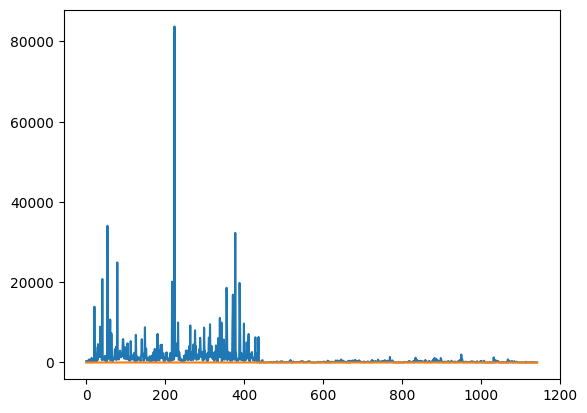

In [5]:

# d4 ex1-2

dong_code1 = set(rdata_L["출발 행정동 코드"].unique())
dong_code2 = set(rdata_L["도착 행정동 코드"].unique())
dong_code = list(set.union(dong_code1, dong_code2))
dong_code.sort() # 동코드 작은 것 부터 번호 붙이려고 소팅
p = len(dong_code)
print("len(dong_code) >>", len(dong_code))
dict_dong_index = dict(zip(dong_code, range(p))) # 쌍으로 있는 것에 dict 캐스팅하면 key, value로 자동 세팅
dict_index_dong = dict(zip(range(p), dong_code))
# dict_index_dong


n = rdata_L.shape[0]

# 3개의 array 구성, 참조 빠르게 하기 위해 array
start_loc = np.array(rdata_L['출발 행정동 코드'], dtype ='int64')
end_loc = np.array( rdata_L['도착 행정동 코드'], dtype ='int64')
pop = np.array(rdata_L['이동인구(합)'], dtype='float32')
trans_mat = np.zeros(shape = (p,p)) # T 행렬 만들었다!, p는 len(dong_code)
i = 0
for i in range(n):
    k1 = dict_dong_index.get(start_loc[i])
    k2 = dict_dong_index.get(end_loc[i])
    trans_mat[k1,k2] = pop[i] # 출 -> 도 행정동 코드의 이동인구 놈을 T 행렬에 넣어주기

    # test전용, 1000번 마다 출력
    if i%1000==0:
        print(i, pop[i])



# axis = 1 으로 주면 out link 의 합이 보인다.
print("plt.plot(trans_mat.sum(axis = 1)) 👇")
plt.plot(trans_mat.sum(axis = 1))
rowsums = trans_mat.sum(axis = 1)
print("sum(rowsums==0) >>", sum(rowsums==0)) # 나누기 해야하니까 0이 있나 없나 체크해야함, 들어오기만 하고 나가는게 없는

# 한 번 뒤집고 나누기 실시, 다시 뒤집기
trans_prob = (trans_mat.T / rowsums).T
trans_prob[rowsums==0, :] = 1/p # 0인 것들은 nan 임 -> 1/p (아주 작은 수) 로 대체함
print("plt.plot(trans_prob[0,:]) 👇")
plt.plot(trans_prob[0,:])


0

(1144,)

error: 0.005977562161728751
prob: 0.9999999999999991
error: 1.387344602415963e-05
prob: 0.9999999999999992
error: 4.887361888354647e-07
prob: 0.9999999999999989
error: 1.9020818883483392e-08
prob: 0.9999999999999989
error: 7.144188608754209e-10
prob: 0.9999999999999989
error: 2.6154032065073274e-11
prob: 0.9999999999999991
error: 9.44810202296864e-13
prob: 0.9999999999999989
error: 3.390863978491865e-14
prob: 0.9999999999999986
error: 1.214306433183765e-15
prob: 0.9999999999999983
error: 4.336808689942018e-17
prob: 0.9999999999999976
error: 3.469446951953614e-18
prob: 0.9999999999999972
error: 1.734723475976807e-18
prob: 0.9999999999999967
error: 3.469446951953614e-18
prob: 0.9999999999999963
error: 1.734723475976807e-18
prob: 0.999999999999996
error: 1.734723475976807e-18
prob: 0.9999999999999957
error: 1.734723475976807e-18
prob: 0.9999999999999956
error: 8.673617379884035e-19
prob: 0.9999999999999953
error: 8.673617379884035e-19
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999

error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.999999999

error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.999999999

error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.9999999999999953
error: 0.0
prob: 0.999999999

0.9999999999999947

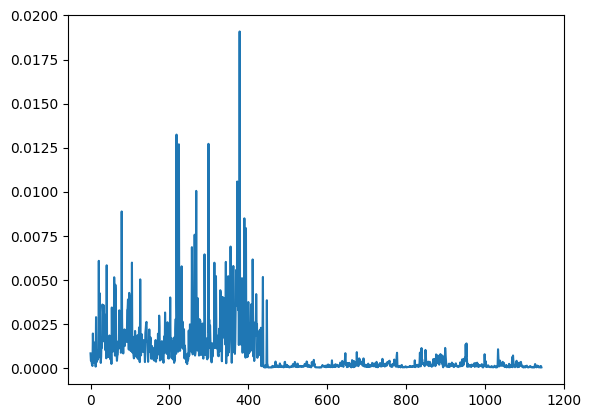

In [46]:

# d4 ex1-3

a = 0.95 # 임의의 값으로 줬음
modif_prob = np.ones((p,p))/p
trans_prob_m = a*trans_prob + (1-a)* modif_prob

# check: 행의 합의 0인 것이 있는지?
np.isnan(trans_prob_m).sum()


iter=10000
np.random.seed(1)
init_prob = np.ones(p) / p
# init_prob =np.random.dirichlet(np.ones(p),1)
init_prob.shape
#trans_prob.sum(axis = 1).min()
for i in range(iter):
    if i==0:
        lim_prob = init_prob @ trans_prob_m    
    else:
        old_prob = lim_prob
        lim_prob = lim_prob @ trans_prob_m
    if (i%10==1):
        err = np.max(abs(lim_prob - old_prob))
        print('error:', err) # 수렴 하는지 체크하려고, 업데이트 했더니 0이야? 그럼 여기서 찍혀? 수렴한다는 뜻
        prob_sum = lim_prob.sum()
        print('prob:', prob_sum)

sum(lim_prob)
lim_prob = lim_prob.reshape(-1)
plt.plot(lim_prob)

# 위 그래프랑 다르게 다른 값들이 살아 났다
# 한 번에 가는 것 뿐 아니라 "여러번 거쳐 갈 수 있는 곳도 포함이 되어서" 그렇다. - 중요도 상승

In [60]:

# d4 ex1-4

print("max(lim_prob) >>", max(lim_prob))
print("1/p >>", 1/p)
np.sort(lim_prob)[-1:-11:-1] # 제일 끝 값 -1 => 역순
idx = np.argsort(lim_prob)[-1:-11:-1]

# 그래서 위에 값이 대체 누구냐? 행정동 코드 역추적
cent_idx = [ dict_index_dong[i] for i in idx ]      
cent_idx


# 행정동 코드 확인하기
col_index = pd.read_csv("./datas/dong_code.csv", nrows = 2, header = None, encoding='cp949')
district_code_info = pd.read_csv("./datas/dong_code.csv", skiprows=1, encoding='cp949')
tmp = []
for i in range(district_code_info.shape[0]):
    v = district_code_info['CT_NM'][i] + " " + district_code_info['H_DNG_NM'][i] 
    tmp.append(v)

    
district_code_info['district'] = tmp

rank = 6 # 찾는 랭크 값 (cent_idx에서 index 포지션이 rank임)
idx = (district_code_info['H_SDNG_CD'] == cent_idx[rank - 1])
if sum(idx)>=1:
    print(district_code_info['district'][idx])
else:
    print(f"찾은 행정동 코드 {idx} 가 DB에 없습니다.")



max(lim_prob) >> 0.019091474394936473
1/p >> 0.0008741258741258741


array([0.01909147, 0.01324531, 0.01272272, 0.01269536, 0.01058627,
       0.01005474, 0.00888894, 0.00849849, 0.00794074, 0.00757137])

[1123064,
 1113075,
 1119054,
 1114066,
 1123052,
 1116069,
 1105053,
 1123078,
 1124052,
 1116064]

0      False
1      False
2      False
3      False
4      False
       ...  
419    False
420    False
421    False
422    False
423    False
Name: H_SDNG_CD, Length: 424, dtype: bool
254    강서구 공항동
Name: district, dtype: object
